In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

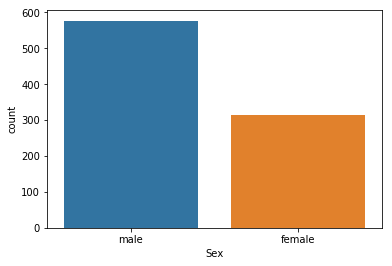

In [11]:
sns.countplot('Sex',data=titanic_df)

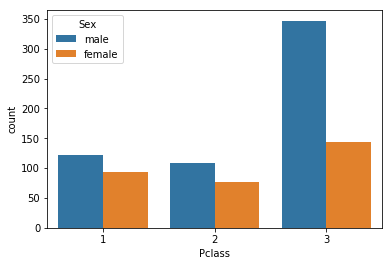

In [13]:
sns.countplot('Pclass',data=titanic_df, hue = 'Sex')

In [14]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [15]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [16]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


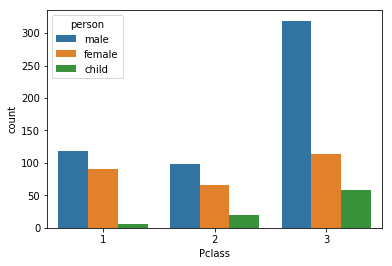

In [17]:
sns.countplot('Pclass', data = titanic_df, hue = 'person')

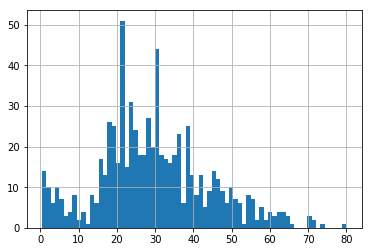

In [18]:
titanic_df['Age'].hist(bins=70)

In [19]:
titanic_df['Age'].mean()

29.69911764705882

In [22]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

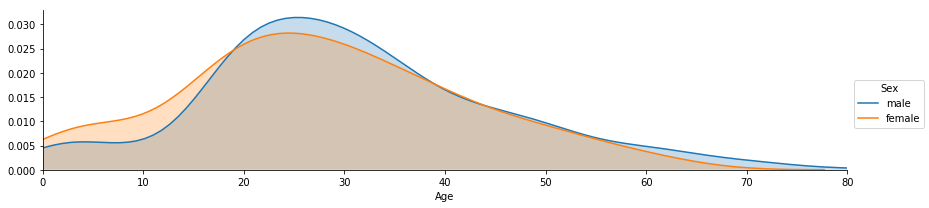

In [25]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()


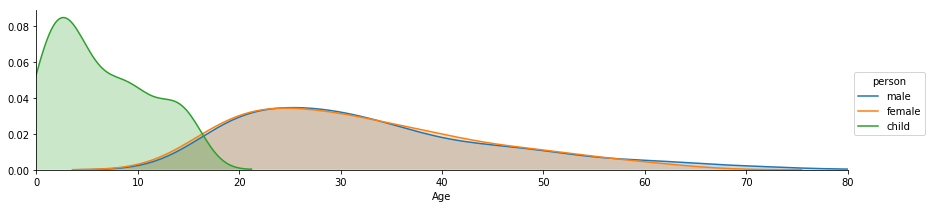

In [27]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

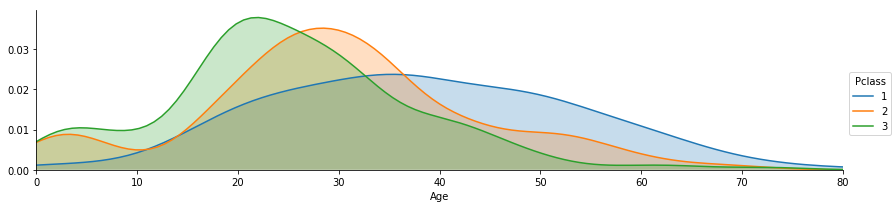

In [28]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [122]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [123]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [32]:
levels = []

for level in deck:
    levels.append(level[0])

In [33]:
levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

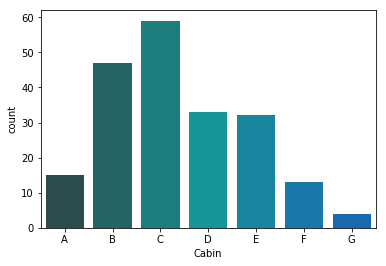

In [45]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin', data=cabin_df, palette = 'winter_d',order=['A','B','C','D','E','F','G'])


In [47]:
cabin_df=cabin_df[cabin_df.Cabin != 'T']

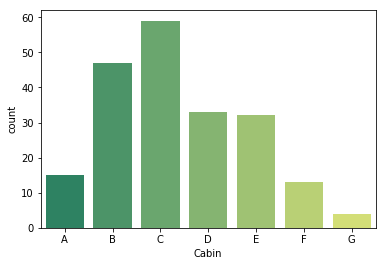

In [48]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin', data=cabin_df, palette = 'summer',order=['A','B','C','D','E','F','G'])

In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


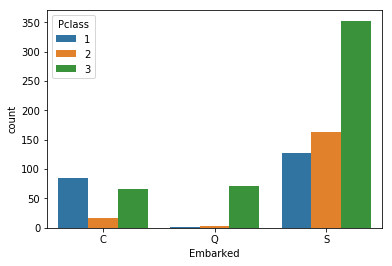

In [52]:
sns.countplot('Embarked', data = titanic_df, hue = 'Pclass', order = ['C','Q','S'])

In [53]:
# Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [54]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [55]:
titanic_df['Alone'] 

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [56]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


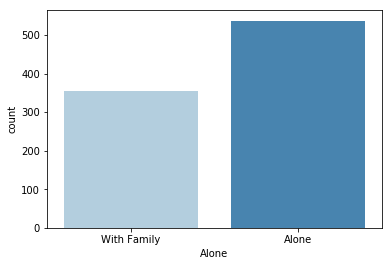

In [59]:
sns.countplot('Alone', data = titanic_df, palette = 'Blues')

In [60]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no', 1:'yes'})

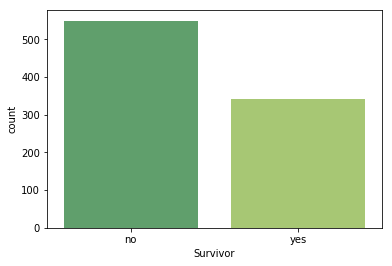

In [61]:
sns.countplot('Survivor', data = titanic_df, palette = 'summer')

In [70]:
sns.countplot('Pclass','Survived',data=titanic_df)

TypeError: Cannot pass values for both `x` and `y`

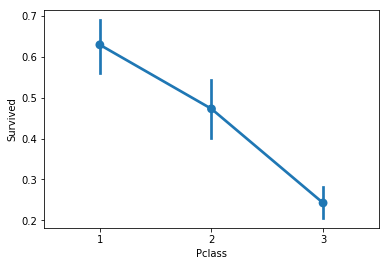

In [84]:
sns.pointplot(x='Pclass',y='Survived',data=titanic_df)

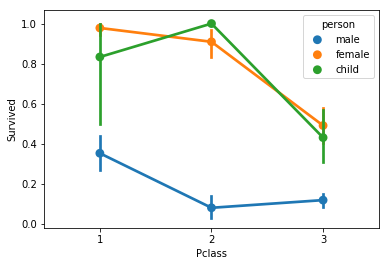

In [85]:
sns.pointplot(x='Pclass',y='Survived',hue = 'person',data=titanic_df)

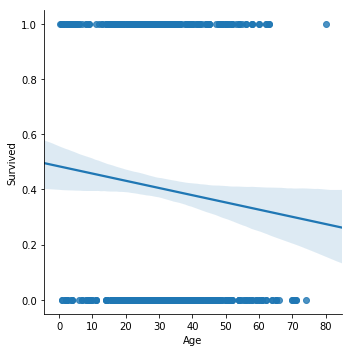

In [86]:
sns.lmplot('Age','Survived',data=titanic_df)

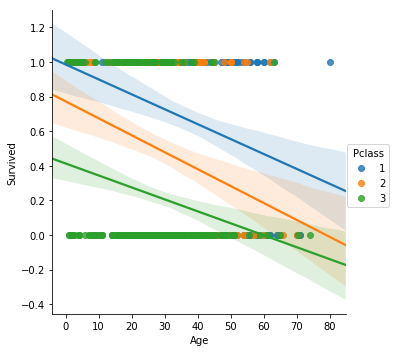

In [87]:
sns.lmplot('Age','Survived',hue = 'Pclass', data=titanic_df)

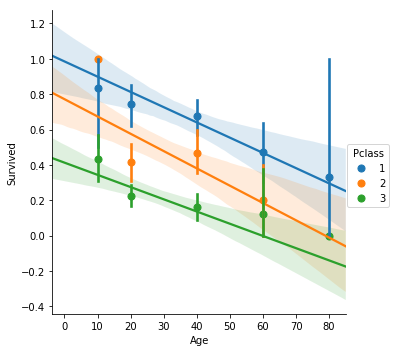

In [88]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, x_bins=generations)

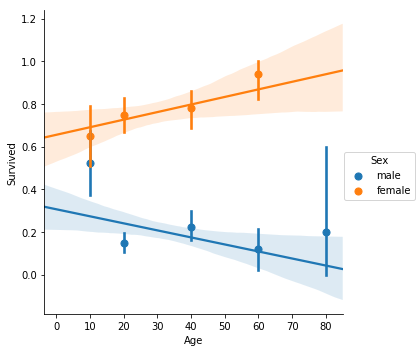

In [89]:
sns.lmplot('Age','Survived', hue='Sex', data=titanic_df, x_bins=generations)

In [116]:
deck_df = DataFrame(data=titanic_df, columns=['Cabin','Survived'])

In [117]:
deck_df

,Cabin,Survived
0,NaN,0
1,C85,1
2,NaN,1
3,C123,1
4,NaN,0
5,NaN,0
6,E46,0
7,NaN,0
8,NaN,1
9,NaN,1


In [124]:
deck_df.dropna()

,Cabin,Survived
1,C85,1
3,C123,1
6,E46,0
10,G6,1
11,C103,1
21,D56,1
23,A6,1
27,C23 C25 C27,0
31,B78,1
52,D33,1


In [121]:
levels = []

for level in deck_df.Cabin:
    levels.append(level[0])

TypeError: 'float' object is not subscriptable

In [137]:
deck_l = deck_df['Cabin'].dropna()

In [138]:
levels = []

for level in deck_l:
    levels.append(level[0])

In [172]:
titanic_df['Deck']=titanic_df.Cabin.str[0]

In [173]:
deck_f=titanic_df.dropna()

In [174]:
deck_f

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,male,Alone,yes,D
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,male,Alone,yes,A
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,male,With Family,no,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,female,With Family,yes,D
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,male,With Family,no,B


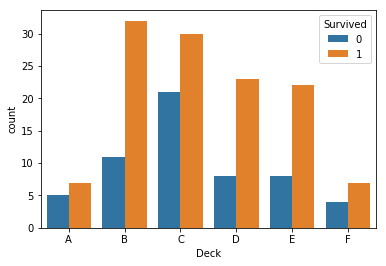

In [175]:
sns.countplot('Deck',data=deck_f, hue ='Survived', order = ['A','B','C','D','E','F'])

In [213]:
deck_f['Deck'].loc[deck_f['Deck']=='T']='T'

/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
deck_f['Deck']

1      C
3      C
6      E
10     G
11     C
21     D
23     A
27     C
52     D
54     B
62     C
66     F
75     F
88     C
92     E
96     A
97     D
102    D
110    C
118    B
123    E
124    D
136    D
137    C
139    B
148    F
151    C
170    B
174    A
177    C
      ..
737    B
741    C
742    B
745    B
748    D
751    E
759    B
763    B
765    D
772    E
779    B
781    B
782    D
789    B
796    D
802    B
806    A
809    E
820    B
823    E
835    E
853    D
857    E
862    D
867    A
871    D
872    B
879    C
887    B
889    C
Name: Deck, Length: 183, dtype: object

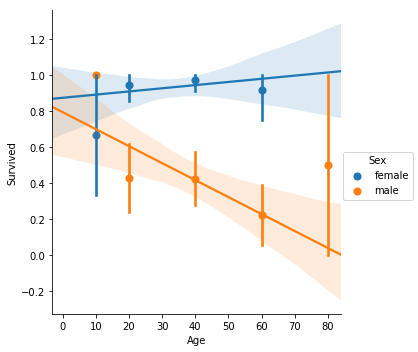

In [224]:
sns.lmplot('Age','Survived',hue = 'Sex',data=deck_f,x_bins=generations)

In [221]:
deck_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 16 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
person         183 non-null object
Alone          183 non-null object
Survivor       183 non-null object
Deck           183 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 29.3+ KB


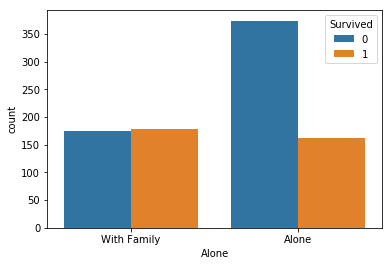

In [223]:
sns.countplot('Alone',data=titanic_df, hue ='Survived')

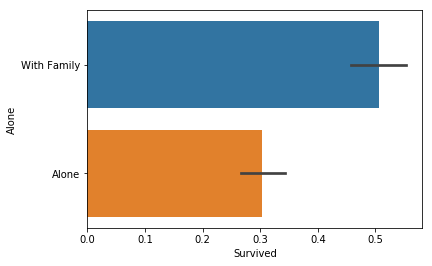

In [232]:
sns.barplot('Survived',data=titanic_df,y='Alone')